# 6.2 Exploring Relationships

## Table of Contents

    1. Notebook Prep
        Import libraries
        Define variable 'path'
        Import US Births dataframe
        Import US Educational Finances dataframe
        Import reformatted US Births dataframe (reformatting performed later in notebook--used as checkpoint)

    2. Reformat US Births dataframe
        Drop unnecessary columns
        Define how to aggregate fields
        Groupby and aggregate
        Export reformatted dataframe

    3. Prepare Dataframes for Combination
        Combination Methodology
            a. Births Dataframe
                Round values in 'avg_mother_age'
                Add 'ref_year' column to determine relevant financial year
                Convert 'ref_year' to integer
                Convert 'ref_year' to string
                Export reformatted dataframe
            b. Finances Dataframe
                Add 'total_expenditure_per_student' column
                Add 'instruction_expenditure_per_student' column
                Add 'support_expenditure_per_student' column
                Sort values by state and year
                Add '7yr_avg_total_per_student' column
                Add '7yr_avg_instruction_per_student' column
                Add '7yr_avg_support_per_student' column
                Delete extra index column
                Change 'year' to 'ref_year'
                Reset index
                Export
         
    4. Merge Dataframes
        Merge US Births and US Education Finances
        Export final dataframe
        
    5. Correlation Heatmap
        Exclude variables without pertinent information
        Create subplot
        Create heatmap
        Correlation analysis
        
    6. Scatterplots
        Explore the correlation between education_code and avg_birth_weight_grams
            Scatterplot analysis
        Explore the correlation between avg_mother_age and avg_birth_weight_grams
            Scatterplot analysis
        Explore the moderate correlation between education_code and avg_mother_age
            Scatterplot analysis
           
    7. Pair Plot
        Create pair plots for the entire data set
        Export figure
        Variable Distribution in Pair Plots
    
    8. Categorical Plot
        Create histogram for avg_birth_weight_grams
        Set categories
        Create categorical plot
        Export
        Interpretation
        
    9. Review Analysis Questions
    
    10. Hypotheses
        
                

### 1. Notebook Prep 

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Define variable 'path'

path = r'D:\Achievement 6'

In [55]:
# Import US Births dataframe

births = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'births_cleaned.csv'))

In [64]:
# Import US Educational Finances dataframe

finances = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'finances_cleaned.csv'))

In [50]:
# Import reformatted US Births dataframe

births_rf = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'births_reformatted.csv'))

In [ ]:
# Import reformatted US Educational Finances dataframe

finances_rf = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'finances_reformatted.csv'))

In [3]:
# Import combined dataframe

births_finances = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'births_finances_combined.csv'))

### 2. Reformat US Births dataframe

In [56]:
# Drop unnecessary columns

births = births.drop(columns = ['state_abbreviation', 'gender'])

In [57]:
# Define how to aggregate fields

agg_functions = {'state':'first', 'year':'first', 'education_level':'first','education_code':'first', 'number_of_births':'sum', 'avg_mother_age':'mean', 'avg_birth_weight_grams':'mean'}

In [58]:
# Groupby and aggregate

births_rf = births.groupby(['state', 'year', 'education_code'], as_index = False).aggregate(agg_functions)

births_rf

state  year                                    education_level  \
0     Alabama  2016                              Unknown or Not Stated   
1     Alabama  2016                                  8th grade or less   
2     Alabama  2016             9th through 12th grade with no diploma   
3     Alabama  2016              High school graduate or GED completed   
4     Alabama  2016              Some college credit, but not a degree   
...       ...   ...                                                ...   
2745  Wyoming  2021              Some college credit, but not a degree   
2746  Wyoming  2021                          Associate degree (AA, AS)   
2747  Wyoming  2021                     Bachelor's degree (BA, AB, BS)   
2748  Wyoming  2021      Master's degree (MA, MS, MEng, MEd, MSW, MBA)   
2749  Wyoming  2021  Doctorate (PhD, EdD) or Professional Degree (M...   

      education_code  number_of_births  avg_mother_age  avg_birth_weight_grams  
0                 -9               121           27.45                 3095.80  
1                  1              2240           27.70                 3174.90  
2                  2              7093           24.00                 3080.60  
3                  3             18061           25.30                 3138.95  
4                  4             12969           26.70                 3187.00  
...              ...               ...             ...                     ...  
2745               4              1491           27.45                 3175.75  
2746               5               760           29.15                 3195.90  
2747               6              1258           31.05                 3237.15  
2748               7               471           32.75                 3201.80  
2749               8               137           33.45                 3163.60  

[2750 rows x 7 columns]

### 3. Prepare Dataframes for Combination

Combination Methodology:

The data for US births contains an average age for the mother. If we assume that the amount of mothers who were held back is insignificant to the data, we can estimate the "average years" the mothers went to public school. We can then supply a rolling average of expenditures for 3 years before and after that year, giving us 7 years to average and cover the spread.

Average Ages Defined

8th grade or less - 13 years old

9th through 12th with no diploma- 15 years old (average age is 15.5, splitting diploma status on both sides of value)

High school graduate and higher - 16 years old

Unknown or Unstated - 14 years old (to split the difference between 8th and 9th grade - most prone to error)

We do not need to know the average ages for anything more advanced than high school because the US Educational Finances dataset only covers grade school.

#### a. Births Dataframe

In [59]:
# Round values in 'avg_mother_age'

births_rf['avg_mother_age'] = births_rf['avg_mother_age'].round().astype('int')

births_rf

state  year                                    education_level  \
0     Alabama  2016                              Unknown or Not Stated   
1     Alabama  2016                                  8th grade or less   
2     Alabama  2016             9th through 12th grade with no diploma   
3     Alabama  2016              High school graduate or GED completed   
4     Alabama  2016              Some college credit, but not a degree   
...       ...   ...                                                ...   
2745  Wyoming  2021              Some college credit, but not a degree   
2746  Wyoming  2021                          Associate degree (AA, AS)   
2747  Wyoming  2021                     Bachelor's degree (BA, AB, BS)   
2748  Wyoming  2021      Master's degree (MA, MS, MEng, MEd, MSW, MBA)   
2749  Wyoming  2021  Doctorate (PhD, EdD) or Professional Degree (M...   

      education_code  number_of_births  avg_mother_age  avg_birth_weight_grams  
0                 -9               121              27                 3095.80  
1                  1              2240              28                 3174.90  
2                  2              7093              24                 3080.60  
3                  3             18061              25                 3138.95  
4                  4             12969              27                 3187.00  
...              ...               ...             ...                     ...  
2745               4              1491              27                 3175.75  
2746               5               760              29                 3195.90  
2747               6              1258              31                 3237.15  
2748               7               471              33                 3201.80  
2749               8               137              33                 3163.60  

[2750 rows x 7 columns]

In [60]:
# Add 'ref_year' column to determine relevant financial year

births_rf.loc[births_rf['education_code'] == -9, 'ref_year'] = 14 + (births_rf['year'] - births_rf['avg_mother_age'])
births_rf.loc[births_rf['education_code'] == 1, 'ref_year'] = 13 +(births_rf['year'] - births_rf['avg_mother_age'])
births_rf.loc[births_rf['education_code'] == 2, 'ref_year'] = 15 +(births_rf['year'] - births_rf['avg_mother_age'])
births_rf.loc[births_rf['education_code'] >2, 'ref_year'] = (16 +(births_rf['year'] - births_rf['avg_mother_age']))

births_rf

state  year                                    education_level  \
0     Alabama  2016                              Unknown or Not Stated   
1     Alabama  2016                                  8th grade or less   
2     Alabama  2016             9th through 12th grade with no diploma   
3     Alabama  2016              High school graduate or GED completed   
4     Alabama  2016              Some college credit, but not a degree   
...       ...   ...                                                ...   
2745  Wyoming  2021              Some college credit, but not a degree   
2746  Wyoming  2021                          Associate degree (AA, AS)   
2747  Wyoming  2021                     Bachelor's degree (BA, AB, BS)   
2748  Wyoming  2021      Master's degree (MA, MS, MEng, MEd, MSW, MBA)   
2749  Wyoming  2021  Doctorate (PhD, EdD) or Professional Degree (M...   

      education_code  number_of_births  avg_mother_age  \
0                 -9               121              27   
1                  1              2240              28   
2                  2              7093              24   
3                  3             18061              25   
4                  4             12969              27   
...              ...               ...             ...   
2745               4              1491              27   
2746               5               760              29   
2747               6              1258              31   
2748               7               471              33   
2749               8               137              33   

      avg_birth_weight_grams  ref_year  
0                    3095.80    2003.0  
1                    3174.90    2001.0  
2                    3080.60    2007.0  
3                    3138.95    2007.0  
4                    3187.00    2005.0  
...                      ...       ...  
2745                 3175.75    2010.0  
2746                 3195.90    2008.0  
2747                 3237.15    2006.0  
2748                 3201.80    2004.0  
2749                 3163.60    2004.0  

[2750 rows x 8 columns]

In [61]:
# Convert 'ref_year' to integer

births_rf['ref_year'] = births_rf['ref_year'].astype('int')

births_rf

state  year                                    education_level  \
0     Alabama  2016                              Unknown or Not Stated   
1     Alabama  2016                                  8th grade or less   
2     Alabama  2016             9th through 12th grade with no diploma   
3     Alabama  2016              High school graduate or GED completed   
4     Alabama  2016              Some college credit, but not a degree   
...       ...   ...                                                ...   
2745  Wyoming  2021              Some college credit, but not a degree   
2746  Wyoming  2021                          Associate degree (AA, AS)   
2747  Wyoming  2021                     Bachelor's degree (BA, AB, BS)   
2748  Wyoming  2021      Master's degree (MA, MS, MEng, MEd, MSW, MBA)   
2749  Wyoming  2021  Doctorate (PhD, EdD) or Professional Degree (M...   

      education_code  number_of_births  avg_mother_age  \
0                 -9               121              27   
1                  1              2240              28   
2                  2              7093              24   
3                  3             18061              25   
4                  4             12969              27   
...              ...               ...             ...   
2745               4              1491              27   
2746               5               760              29   
2747               6              1258              31   
2748               7               471              33   
2749               8               137              33   

      avg_birth_weight_grams  ref_year  
0                    3095.80      2003  
1                    3174.90      2001  
2                    3080.60      2007  
3                    3138.95      2007  
4                    3187.00      2005  
...                      ...       ...  
2745                 3175.75      2010  
2746                 3195.90      2008  
2747                 3237.15      2006  
2748                 3201.80      2004  
2749                 3163.60      2004  

[2750 rows x 8 columns]

In [84]:
# Convert 'ref_year' to string

births_rf['ref_year'] = births_rf['ref_year'].astype('str')

In [85]:
# Export reformatted dataframe

births_rf.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'births_reformatted.csv'))

#### b. Finances Dataframe

In [65]:
finances

Unnamed: 0          state  year   enrolled  total_revenue  \
0              0        Alabama  1992        NaN        2678885   
1              1         Alaska  1992        NaN        1049591   
2              2        Arizona  1992        NaN        3258079   
3              3       Arkansas  1992        NaN        1711959   
4              4     California  1992        NaN       26260025   
...          ...            ...   ...        ...            ...   
1270        1270       Virginia  2016  1283493.0       16259274   
1271        1271     Washington  2016  1083973.0       14964364   
1272        1272  West Virginia  2016   276764.0        3391579   
1273        1273      Wisconsin  2016   857736.0       11697466   
1274        1274        Wyoming  2016    94511.0        2044669   

      federal_revenue  state_revenue  local_revenue  total_expenditure  \
0              304177        1659028         715680            2653798   
1              106780         720711         222100             972488   
2              297888        1369815        1590376            3401580   
3              178571         958785         574603            1743022   
4             2072470       16546514        7641041           27138832   
...               ...            ...            ...                ...   
1270          1058146        6297587        8903541           16497520   
1271          1097684        9211201        4655479           15253296   
1272           358068        1863062        1170449            3366566   
1273           782610        5986763        4928093           11787535   
1274           123012        1175899         745758            2034229   

      instruction_expenditure  support_services_expenditure  \
0                     1481703                        735036   
1                      498362                        350902   
2                     1435908                       1007732   
3                      964323                        483488   
4                    14358922                       8520926   
...                       ...                           ...   
1270                  8944614                       5164699   
1271                  7087365                       4904575   
1272                  1804235                       1127255   
1273                  5760418                       3691439   
1274                   921494                        585700   

      other_expenditure  capital_outlay_expenditure  
0                   NaN                      174053  
1                   NaN                       37451  
2                   NaN                      609114  
3                   NaN                      145212  
4                   NaN                     2044688  
...                 ...                         ...  
1270           643506.0                     1161323  
1271           577606.0                     2204059  
1272           236487.0                      181392  
1273           508013.0                     1082849  
1274            53570.0                      454302  

[1275 rows x 13 columns]

In [66]:
# Add 'total_expenditure_per_student' column

finances['total_expenditure_per_student'] = finances['total_expenditure'] / finances['enrolled']

In [67]:
# Add 'instruction_expenditure_per_student' column

finances['instruction_expenditure_per_student'] = finances['instruction_expenditure'] / finances['enrolled']

In [68]:
# Add 'support_expenditure_per_student' column

finances['support_expenditure_per_student'] = finances['support_services_expenditure'] / finances['enrolled']

finances

Unnamed: 0          state  year   enrolled  total_revenue  \
0              0        Alabama  1992        NaN        2678885   
1              1         Alaska  1992        NaN        1049591   
2              2        Arizona  1992        NaN        3258079   
3              3       Arkansas  1992        NaN        1711959   
4              4     California  1992        NaN       26260025   
...          ...            ...   ...        ...            ...   
1270        1270       Virginia  2016  1283493.0       16259274   
1271        1271     Washington  2016  1083973.0       14964364   
1272        1272  West Virginia  2016   276764.0        3391579   
1273        1273      Wisconsin  2016   857736.0       11697466   
1274        1274        Wyoming  2016    94511.0        2044669   

      federal_revenue  state_revenue  local_revenue  total_expenditure  \
0              304177        1659028         715680            2653798   
1              106780         720711         222100             972488   
2              297888        1369815        1590376            3401580   
3              178571         958785         574603            1743022   
4             2072470       16546514        7641041           27138832   
...               ...            ...            ...                ...   
1270          1058146        6297587        8903541           16497520   
1271          1097684        9211201        4655479           15253296   
1272           358068        1863062        1170449            3366566   
1273           782610        5986763        4928093           11787535   
1274           123012        1175899         745758            2034229   

      instruction_expenditure  support_services_expenditure  \
0                     1481703                        735036   
1                      498362                        350902   
2                     1435908                       1007732   
3                      964323                        483488   
4                    14358922                       8520926   
...                       ...                           ...   
1270                  8944614                       5164699   
1271                  7087365                       4904575   
1272                  1804235                       1127255   
1273                  5760418                       3691439   
1274                   921494                        585700   

      other_expenditure  capital_outlay_expenditure  \
0                   NaN                      174053   
1                   NaN                       37451   
2                   NaN                      609114   
3                   NaN                      145212   
4                   NaN                     2044688   
...                 ...                         ...   
1270           643506.0                     1161323   
1271           577606.0                     2204059   
1272           236487.0                      181392   
1273           508013.0                     1082849   
1274            53570.0                      454302   

      total_expenditure_per_student  instruction_expenditure_per_student  \
0                               NaN                                  NaN   
1                               NaN                                  NaN   
2                               NaN                                  NaN   
3                               NaN                                  NaN   
4                               NaN                                  NaN   
...                             ...                                  ...   
1270                      12.853611                             6.968962   
1271                      14.071657                             6.538322   
1272                      12.164031                             6.519038   
1273                      13.742614                             6.715840   
1274                      21.523727                       

In [69]:
# Sort values by state and year

finances['year'] = finances['year'].astype('str')

finances = finances.sort_values(['state','year'])

finances

Unnamed: 0    state  year  enrolled  total_revenue  federal_revenue  \
0              0  Alabama  1992       NaN        2678885           304177   
51            51  Alabama  1993  727716.0        2827391           331409   
102          102  Alabama  1994  730004.0        2970223           331823   
153          153  Alabama  1995  727480.0        3367437           328957   
204          204  Alabama  1996  735912.0        3365113           334858   
...          ...      ...   ...       ...            ...              ...   
1070        1070  Wyoming  2012   89994.0        1664983           144728   
1121        1121  Wyoming  2013   91533.0        1695967           113501   
1172        1172  Wyoming  2014   92732.0        1772633           112709   
1223        1223  Wyoming  2015   93867.0        1962874           120290   
1274        1274  Wyoming  2016   94511.0        2044669           123012   

      state_revenue  local_revenue  total_expenditure  \
0           1659028         715680            2653798   
51          1729295         766687            2833433   
102         1850894         787506            3103266   
153         2161366         877114            3353363   
204         2138717         891538            3572283   
...             ...            ...                ...   
1070         851896         668359            1670728   
1121         881114         701352            1675477   
1172         965213         694711            1775999   
1223        1116917         725667            1942406   
1274        1175899         745758            2034229   

      instruction_expenditure  support_services_expenditure  \
0                     1481703                        735036   
51                    1564558                        794146   
102                   1697593                        826442   
153                   1851700                        888983   
204                   1987018                        935115   
...                       ...                           ...   
1070                   845801                        540510   
1121                   846872                        546422   
1172                   865932                        555761   
1223                   895910                        565489   
1274                   921494                        585700   

      other_expenditure  capital_outlay_expenditure  \
0                   NaN                      174053   
51             237222.0                      204207   
102            306977.0                      231508   
153            326956.0                      243365   
204            322883.0                      286699   
...                 ...                         ...   
1070            53299.0                      213245   
1121            52001.0                      213920   
1172            50715.0                      287977   
1223            52520.0                      409425   
1274            53570.0                      454302   

      total_expenditure_per_student  instruction_expenditure_per_student  \
0                               NaN                                  NaN   
51                         3.893597                             2.149957   
102                        4.251026                             2.325457   
153                        4.609560                             2.545362   
204                        4.854226                             2.700076   
...                             ...                                  ...   
1070                      18.564882                             9.398415   
1121                      18.304622                             9.252095   
1172                      19.151954                             9.338006   
1223                      20.693172                             9.544462   
1274                      21.523727                             9.750124   

      support_expenditure_per_student  
0                        

In [70]:
# Add '7yr_avg_total_per_student' column

finances['7yr_avg_total_per_student'] = finances.groupby(['state'])['total_expenditure_per_student'].rolling(7, min_periods = 1, center = True).mean().values

finances.head(30)

Unnamed: 0    state  year  enrolled  total_revenue  federal_revenue  \
0              0  Alabama  1992       NaN        2678885           304177   
51            51  Alabama  1993  727716.0        2827391           331409   
102          102  Alabama  1994  730004.0        2970223           331823   
153          153  Alabama  1995  727480.0        3367437           328957   
204          204  Alabama  1996  735912.0        3365113           334858   
255          255  Alabama  1997  737386.0        3981788           376200   
306          306  Alabama  1998  739321.0        4140537           374153   
357          357  Alabama  1999  737639.0        4471546           393095   
408          408  Alabama  2000  730184.0        4885917           425978   
459          459  Alabama  2001  728532.0        4832946           466150   
510          510  Alabama  2002  726367.0        5128559           508425   
561          561  Alabama  2003  727900.0        5196054           567704   
612          612  Alabama  2004  730418.0        5356113           625666   
663          663  Alabama  2005  729342.0        5889966           665924   
714          714  Alabama  2006  743265.0        6364028           730112   
765          765  Alabama  2007  743273.0        7069040           689072   
816          816  Alabama  2008  742919.0        7726213           711391   
867          867  Alabama  2009  745668.0        7186390           728795   
918          918  Alabama  2010  748889.0        7281058          1134111   
969          969  Alabama  2011  746933.0        7376725          1077070   
1020        1020  Alabama  2012  744621.0        7136949           789954   
1071        1071  Alabama  2013  744548.0        7197439           811739   
1122        1122  Alabama  2014  740081.0        7357267           794090   
1173        1173  Alabama  2015  734974.0        7360222           795238   
1224        1224  Alabama  2016  734652.0        7498567           797631   
1              1   Alaska  1992       NaN        1049591           106780   
52            52   Alaska  1993  121156.0        1191398           176150   
103          103   Alaska  1994  123868.0        1052282           134168   
154          154   Alaska  1995  125421.0        1117068           123037   
205          205   Alaska  1996  126189.0        1120346           123505   

      state_revenue  local_revenue  total_expenditure  \
0           1659028         715680            2653798   
51          1729295         766687            2833433   
102         1850894         787506            3103266   
153         2161366         877114            3353363   
204         2138717         891538            3572283   
255         2498847        1106741            3963624   
306         2589819        1176565            4245033   
357         2752653        1325798            4622810   
408         3003814        1456125            5003267   
459         2879636        1487160            5086045   
510         3010983        1609151            5147821   
561         2966981        1661369            5298932   
612         2971520        1758927            5450269   
663         3247562        1976480            5904664   
714         3540436        2093480            6591429   
765         4070949        2309019            7196459   
816         4649053        2365769            7847387   
867         4161103        2296492            7815467   
918         3800128        2346819            7647571   
969         3965614        2334041            7411768   
1020        3948651        2398344            7222161   
1071        3898347        2487353            7487741   
1122        4031547        2531630            7587737   
1173        4080167        2484817            7501799   
1224        4097696        2603240            7708845   
1            720711         222100             972488   
52           775829         239419            1126398   
103          668229   

In [71]:
# Add '7yr_avg_instruction_per_student' column

finances['7yr_avg_instruction_per_student'] = finances.groupby(['state'])['instruction_expenditure_per_student'].rolling(7, min_periods = 1, center = True).mean().values


In [72]:
# Add '7yr_avg_support_per_student' column

finances['7yr_avg_support_per_student'] = finances.groupby(['state'])['support_expenditure_per_student'].rolling(7, min_periods = 1, center = True).mean().values

finances

Unnamed: 0    state  year  enrolled  total_revenue  federal_revenue  \
0              0  Alabama  1992       NaN        2678885           304177   
51            51  Alabama  1993  727716.0        2827391           331409   
102          102  Alabama  1994  730004.0        2970223           331823   
153          153  Alabama  1995  727480.0        3367437           328957   
204          204  Alabama  1996  735912.0        3365113           334858   
...          ...      ...   ...       ...            ...              ...   
1070        1070  Wyoming  2012   89994.0        1664983           144728   
1121        1121  Wyoming  2013   91533.0        1695967           113501   
1172        1172  Wyoming  2014   92732.0        1772633           112709   
1223        1223  Wyoming  2015   93867.0        1962874           120290   
1274        1274  Wyoming  2016   94511.0        2044669           123012   

      state_revenue  local_revenue  total_expenditure  \
0           1659028         715680            2653798   
51          1729295         766687            2833433   
102         1850894         787506            3103266   
153         2161366         877114            3353363   
204         2138717         891538            3572283   
...             ...            ...                ...   
1070         851896         668359            1670728   
1121         881114         701352            1675477   
1172         965213         694711            1775999   
1223        1116917         725667            1942406   
1274        1175899         745758            2034229   

      instruction_expenditure  support_services_expenditure  \
0                     1481703                        735036   
51                    1564558                        794146   
102                   1697593                        826442   
153                   1851700                        888983   
204                   1987018                        935115   
...                       ...                           ...   
1070                   845801                        540510   
1121                   846872                        546422   
1172                   865932                        555761   
1223                   895910                        565489   
1274                   921494                        585700   

      other_expenditure  capital_outlay_expenditure  \
0                   NaN                      174053   
51             237222.0                      204207   
102            306977.0                      231508   
153            326956.0                      243365   
204            322883.0                      286699   
...                 ...                         ...   
1070            53299.0                      213245   
1121            52001.0                      213920   
1172            50715.0                      287977   
1223            52520.0                      409425   
1274            53570.0                      454302   

      total_expenditure_per_student  instruction_expenditure_per_student  \
0                               NaN                                  NaN   
51                         3.893597                             2.149957   
102                        4.251026                             2.325457   
153                        4.609560                             2.545362   
204                        4.854226                             2.700076   
...                             ...                                  ...   
1070                      18.564882                             9.398415   
1121                      18.304622                             9.252095   
1172                      19.151954                             9.338006   
1223                      20.693172                             9.544462   
1274                      21.523727                             9.750124   

      support_expenditure_per_student  7yr_avg_total_per_student 

In [73]:
# Delete extra index column

del finances['Unnamed: 0']

finances

state  year  enrolled  total_revenue  federal_revenue  state_revenue  \
0     Alabama  1992       NaN        2678885           304177        1659028   
51    Alabama  1993  727716.0        2827391           331409        1729295   
102   Alabama  1994  730004.0        2970223           331823        1850894   
153   Alabama  1995  727480.0        3367437           328957        2161366   
204   Alabama  1996  735912.0        3365113           334858        2138717   
...       ...   ...       ...            ...              ...            ...   
1070  Wyoming  2012   89994.0        1664983           144728         851896   
1121  Wyoming  2013   91533.0        1695967           113501         881114   
1172  Wyoming  2014   92732.0        1772633           112709         965213   
1223  Wyoming  2015   93867.0        1962874           120290        1116917   
1274  Wyoming  2016   94511.0        2044669           123012        1175899   

      local_revenue  total_expenditure  instruction_expenditure  \
0            715680            2653798                  1481703   
51           766687            2833433                  1564558   
102          787506            3103266                  1697593   
153          877114            3353363                  1851700   
204          891538            3572283                  1987018   
...             ...                ...                      ...   
1070         668359            1670728                   845801   
1121         701352            1675477                   846872   
1172         694711            1775999                   865932   
1223         725667            1942406                   895910   
1274         745758            2034229                   921494   

      support_services_expenditure  other_expenditure  \
0                           735036                NaN   
51                          794146           237222.0   
102                         826442           306977.0   
153                         888983           326956.0   
204                         935115           322883.0   
...                            ...                ...   
1070                        540510            53299.0   
1121                        546422            52001.0   
1172                        555761            50715.0   
1223                        565489            52520.0   
1274                        585700            53570.0   

      capital_outlay_expenditure  total_expenditure_per_student  \
0                         174053                            NaN   
51                        204207                       3.893597   
102                       231508                       4.251026   
153                       243365                       4.609560   
204                       286699                       4.854226   
...                          ...                            ...   
1070                      213245                      18.564882   
1121                      213920                      18.304622   
1172                      287977                      19.151954   
1223                      409425                      20.693172   
1274                      454302                      21.523727   

      instruction_expenditure_per_student  support_expenditure_per_student  \
0                                     NaN                              NaN   
51                               2.149957                         1.091286   
102                              2.325457                         1.132106   
153                              2.545362                         1.222003   
204                              2.700076                         1.270689   
...                                   ...                              ...   
1070                             9.398415                         6.006067   
1121                             9.252095                         5.969672   
1172                             9.338006         

In [77]:
# Change 'year' to 'ref_year'

finances = finances.rename(columns = {'year':'ref_year'})

finances

state ref_year  enrolled  total_revenue  federal_revenue  \
0     Alabama     1992       NaN        2678885           304177   
51    Alabama     1993  727716.0        2827391           331409   
102   Alabama     1994  730004.0        2970223           331823   
153   Alabama     1995  727480.0        3367437           328957   
204   Alabama     1996  735912.0        3365113           334858   
...       ...      ...       ...            ...              ...   
1070  Wyoming     2012   89994.0        1664983           144728   
1121  Wyoming     2013   91533.0        1695967           113501   
1172  Wyoming     2014   92732.0        1772633           112709   
1223  Wyoming     2015   93867.0        1962874           120290   
1274  Wyoming     2016   94511.0        2044669           123012   

      state_revenue  local_revenue  total_expenditure  \
0           1659028         715680            2653798   
51          1729295         766687            2833433   
102         1850894         787506            3103266   
153         2161366         877114            3353363   
204         2138717         891538            3572283   
...             ...            ...                ...   
1070         851896         668359            1670728   
1121         881114         701352            1675477   
1172         965213         694711            1775999   
1223        1116917         725667            1942406   
1274        1175899         745758            2034229   

      instruction_expenditure  support_services_expenditure  \
0                     1481703                        735036   
51                    1564558                        794146   
102                   1697593                        826442   
153                   1851700                        888983   
204                   1987018                        935115   
...                       ...                           ...   
1070                   845801                        540510   
1121                   846872                        546422   
1172                   865932                        555761   
1223                   895910                        565489   
1274                   921494                        585700   

      other_expenditure  capital_outlay_expenditure  \
0                   NaN                      174053   
51             237222.0                      204207   
102            306977.0                      231508   
153            326956.0                      243365   
204            322883.0                      286699   
...                 ...                         ...   
1070            53299.0                      213245   
1121            52001.0                      213920   
1172            50715.0                      287977   
1223            52520.0                      409425   
1274            53570.0                      454302   

      total_expenditure_per_student  instruction_expenditure_per_student  \
0                               NaN                                  NaN   
51                         3.893597                             2.149957   
102                        4.251026                             2.325457   
153                        4.609560                             2.545362   
204                        4.854226                             2.700076   
...                             ...                                  ...   
1070                      18.564882                             9.398415   
1121                      18.304622                             9.252095   
1172                      19.151954                             9.338006   
1223                      20.693172                             9.544462   
1274                      21.523727                             9.750124   

      support_expenditure_per_student  7yr_avg_total_per_student  \
0                                 NaN                   4.251395   
51                           1.091286  

In [78]:
# Reset index

finances.reset_index(drop = True)

state ref_year  enrolled  total_revenue  federal_revenue  \
0     Alabama     1992       NaN        2678885           304177   
1     Alabama     1993  727716.0        2827391           331409   
2     Alabama     1994  730004.0        2970223           331823   
3     Alabama     1995  727480.0        3367437           328957   
4     Alabama     1996  735912.0        3365113           334858   
...       ...      ...       ...            ...              ...   
1270  Wyoming     2012   89994.0        1664983           144728   
1271  Wyoming     2013   91533.0        1695967           113501   
1272  Wyoming     2014   92732.0        1772633           112709   
1273  Wyoming     2015   93867.0        1962874           120290   
1274  Wyoming     2016   94511.0        2044669           123012   

      state_revenue  local_revenue  total_expenditure  \
0           1659028         715680            2653798   
1           1729295         766687            2833433   
2           1850894         787506            3103266   
3           2161366         877114            3353363   
4           2138717         891538            3572283   
...             ...            ...                ...   
1270         851896         668359            1670728   
1271         881114         701352            1675477   
1272         965213         694711            1775999   
1273        1116917         725667            1942406   
1274        1175899         745758            2034229   

      instruction_expenditure  support_services_expenditure  \
0                     1481703                        735036   
1                     1564558                        794146   
2                     1697593                        826442   
3                     1851700                        888983   
4                     1987018                        935115   
...                       ...                           ...   
1270                   845801                        540510   
1271                   846872                        546422   
1272                   865932                        555761   
1273                   895910                        565489   
1274                   921494                        585700   

      other_expenditure  capital_outlay_expenditure  \
0                   NaN                      174053   
1              237222.0                      204207   
2              306977.0                      231508   
3              326956.0                      243365   
4              322883.0                      286699   
...                 ...                         ...   
1270            53299.0                      213245   
1271            52001.0                      213920   
1272            50715.0                      287977   
1273            52520.0                      409425   
1274            53570.0                      454302   

      total_expenditure_per_student  instruction_expenditure_per_student  \
0                               NaN                                  NaN   
1                          3.893597                             2.149957   
2                          4.251026                             2.325457   
3                          4.609560                             2.545362   
4                          4.854226                             2.700076   
...                             ...                                  ...   
1270                      18.564882                             9.398415   
1271                      18.304622                             9.252095   
1272                      19.151954                             9.338006   
1273                      20.693172                             9.544462   
1274                      21.523727                             9.750124   

      support_expenditure_per_student  7yr_avg_total_per_student  \
0                                 NaN                   4.251395   
1                            1.091286  

In [79]:
# Export

finances.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'finances_reformatted.csv'))

### 4. Merge Dataframes

In [86]:
# Merge US Births and US Educational Finances

births_finances = births_rf.merge(finances, how = 'left', on = ['state','ref_year'])

births_finances

state  year                                    education_level  \
0     Alabama  2016                              Unknown or Not Stated   
1     Alabama  2016                                  8th grade or less   
2     Alabama  2016             9th through 12th grade with no diploma   
3     Alabama  2016              High school graduate or GED completed   
4     Alabama  2016              Some college credit, but not a degree   
...       ...   ...                                                ...   
2745  Wyoming  2021              Some college credit, but not a degree   
2746  Wyoming  2021                          Associate degree (AA, AS)   
2747  Wyoming  2021                     Bachelor's degree (BA, AB, BS)   
2748  Wyoming  2021      Master's degree (MA, MS, MEng, MEd, MSW, MBA)   
2749  Wyoming  2021  Doctorate (PhD, EdD) or Professional Degree (M...   

      education_code  number_of_births  avg_mother_age  \
0                 -9               121              27   
1                  1              2240              28   
2                  2              7093              24   
3                  3             18061              25   
4                  4             12969              27   
...              ...               ...             ...   
2745               4              1491              27   
2746               5               760              29   
2747               6              1258              31   
2748               7               471              33   
2749               8               137              33   

      avg_birth_weight_grams ref_year  enrolled  total_revenue  ...  \
0                    3095.80     2003  727900.0        5196054  ...   
1                    3174.90     2001  728532.0        4832946  ...   
2                    3080.60     2007  743273.0        7069040  ...   
3                    3138.95     2007  743273.0        7069040  ...   
4                    3187.00     2005  729342.0        5889966  ...   
...                      ...      ...       ...            ...  ...   
2745                 3175.75     2010   87379.0        1718605  ...   
2746                 3195.90     2008   85991.0        1602514  ...   
2747                 3237.15     2006   86155.0        1150345  ...   
2748                 3201.80     2004   86925.0         974888  ...   
2749                 3163.60     2004   86925.0         974888  ...   

      instruction_expenditure  support_services_expenditure  \
0                     2817111                       1521462   
1                     2656393                       1374265   
2                     3653466                       2174210   
3                     3653466                       2174210   
4                     3053380                       1744013   
...                       ...                           ...   
2745                   787627                        504838   
2746                   703831                        449989   
2747                   571127                        362807   
2748                   483989                        303976   
2749                   483989                        303976   

      other_expenditure  capital_outlay_expenditure  \
0              424662.0                      432279   
1              426481.0                      540284   
2              546077.0                      687816   
3              546077.0                      687816   
4              462605.0                      511944   
...                 ...                         ...   
2745            49289.0                      340678   
2746            43352.0                      309892   
2747            34310.0                      168214   
2748            28257.0                      126574   
2749            28257.0                      126574   

      total_expenditure_per_student  instruction_expenditure_per_student  \
0                          7.279753                             3.870190   

In [87]:
# Export final dataframe

births_finances.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'births_finances_combined.csv'))

### 5. Correlation Heatmap

In [4]:
# Exclude variables without pertinent information

sub = births_finances[['state','education_code', 'number_of_births', 'avg_mother_age', 'avg_birth_weight_grams', '7yr_avg_total_per_student', '7yr_avg_instruction_per_student', '7yr_avg_support_per_student']]

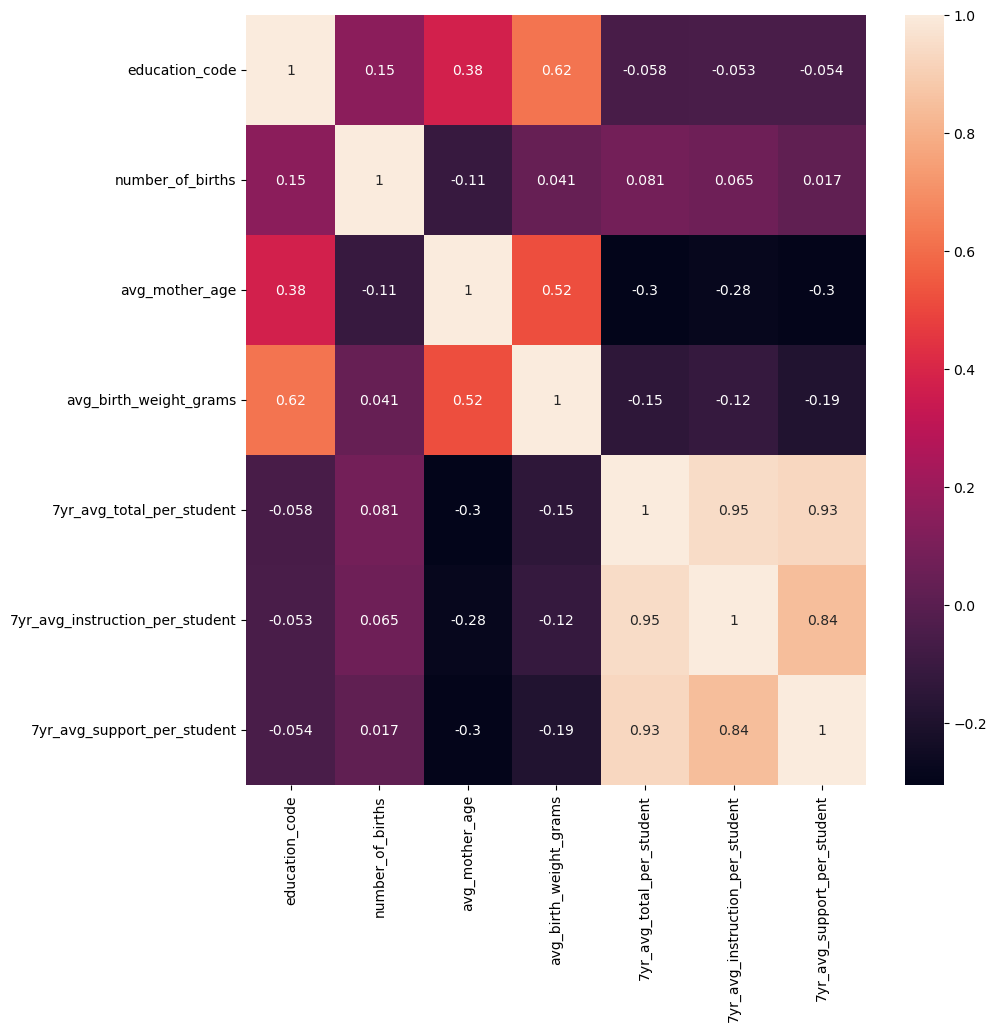

In [5]:
# Create subplot

f, ax = plt.subplots(figsize = (10,10))

# Create heatmap

corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

CORRELATION ANALYSIS

The relationships between the variables are thus:

WEAK RELATIONSHIPS

"education_code and number_of_births" - there's only a tenuous link between educational level and number of children

"number_of_births and avg_mother_age" - there's a very slight negative correlation between the mother's age and number of children

"avg_mother_age and 7yr_avg_*funding* per_student" - School funding is only tangentially related to the age at which one becomes a mother

"avg_birth_weight_grams and 7yr_avg_*funding* per_student" - There is only a very weak negative correlation between average birth weight and school funding



MODERATE RELATIONSHIPS

"education_code and avg_mother_age" - The mother's age does seem to correlate with educational level, which makes sense on the surface. Many people may have to delay motherhood to complete higher levels of education.



STRONG RELATIONSHIPS

"education_code and avg_birth_weight_grams" - Surprisingly, there seems to be a strong correlation between educational level and the birth weight of a mother's child

"avg_mother_age and avg_birth_weight_grams" - A child's birth weight has a strong positive correlation with the mother's age


### 6. Scatterplots

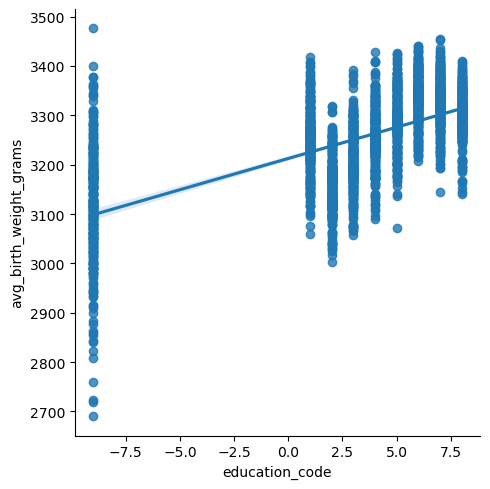

In [93]:
# Explore the correlation between education_code and avg_birth_weight_grams

sns.lmplot(x = 'education_code', y = 'avg_birth_weight_grams', data = sub)

This scatterplot would indicate that those who completed school only up to 8th grade (education code 1) are likely to have children with a higher birth weight than some others, but immediately upon viewing high school (education code 2 and 3), the birth weights drop. As education goes up, birth rate continues to climb until it drops again after attaining Ph.D. level education.

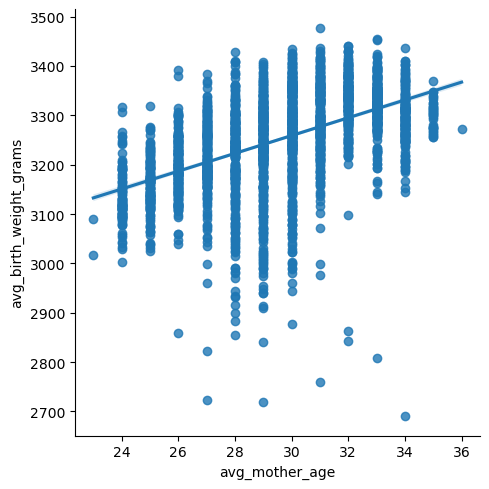

In [94]:
# Explore the correlation between avg_mother_age and avg_birth_weight_grams

sns.lmplot(x = 'avg_mother_age', y = 'avg_birth_weight_grams', data = sub)

Birth weight starts low with the low age of the mother, but it steadily climbs until around the age of 32. After 32, birth weight begins to decline slightly. Interestingly, between the ages of 26 to 34, the variability of birth weight seems to expand (with more than a few children being born with significantly lower birth weights than the average). This might indicate an age range at which some biological event occurs that effects gestation.

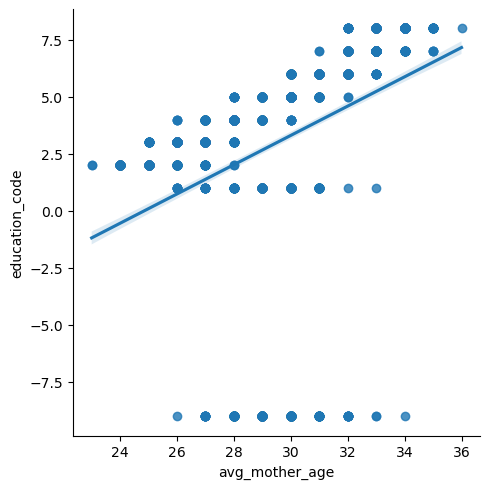

In [95]:
# Explore the moderate correlation between education_code and avg_mother_age

sns.lmplot(x='avg_mother_age', y = 'education_code', data = sub)

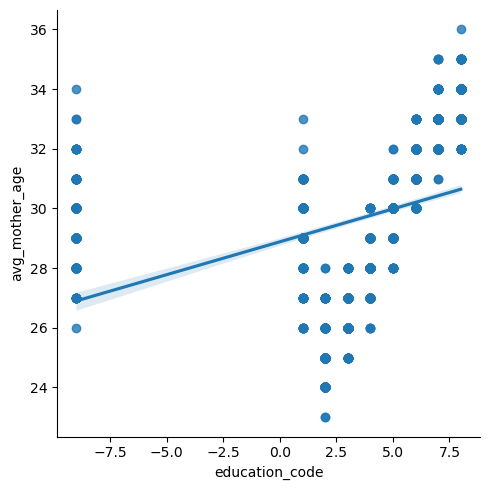

In [96]:
sns.lmplot(x='education_code', y = 'avg_mother_age', data = sub)

This plot indicates that the age at which one becomes a mother is likely to increase as higher educational levels are attained.

### 7. Pair Plot

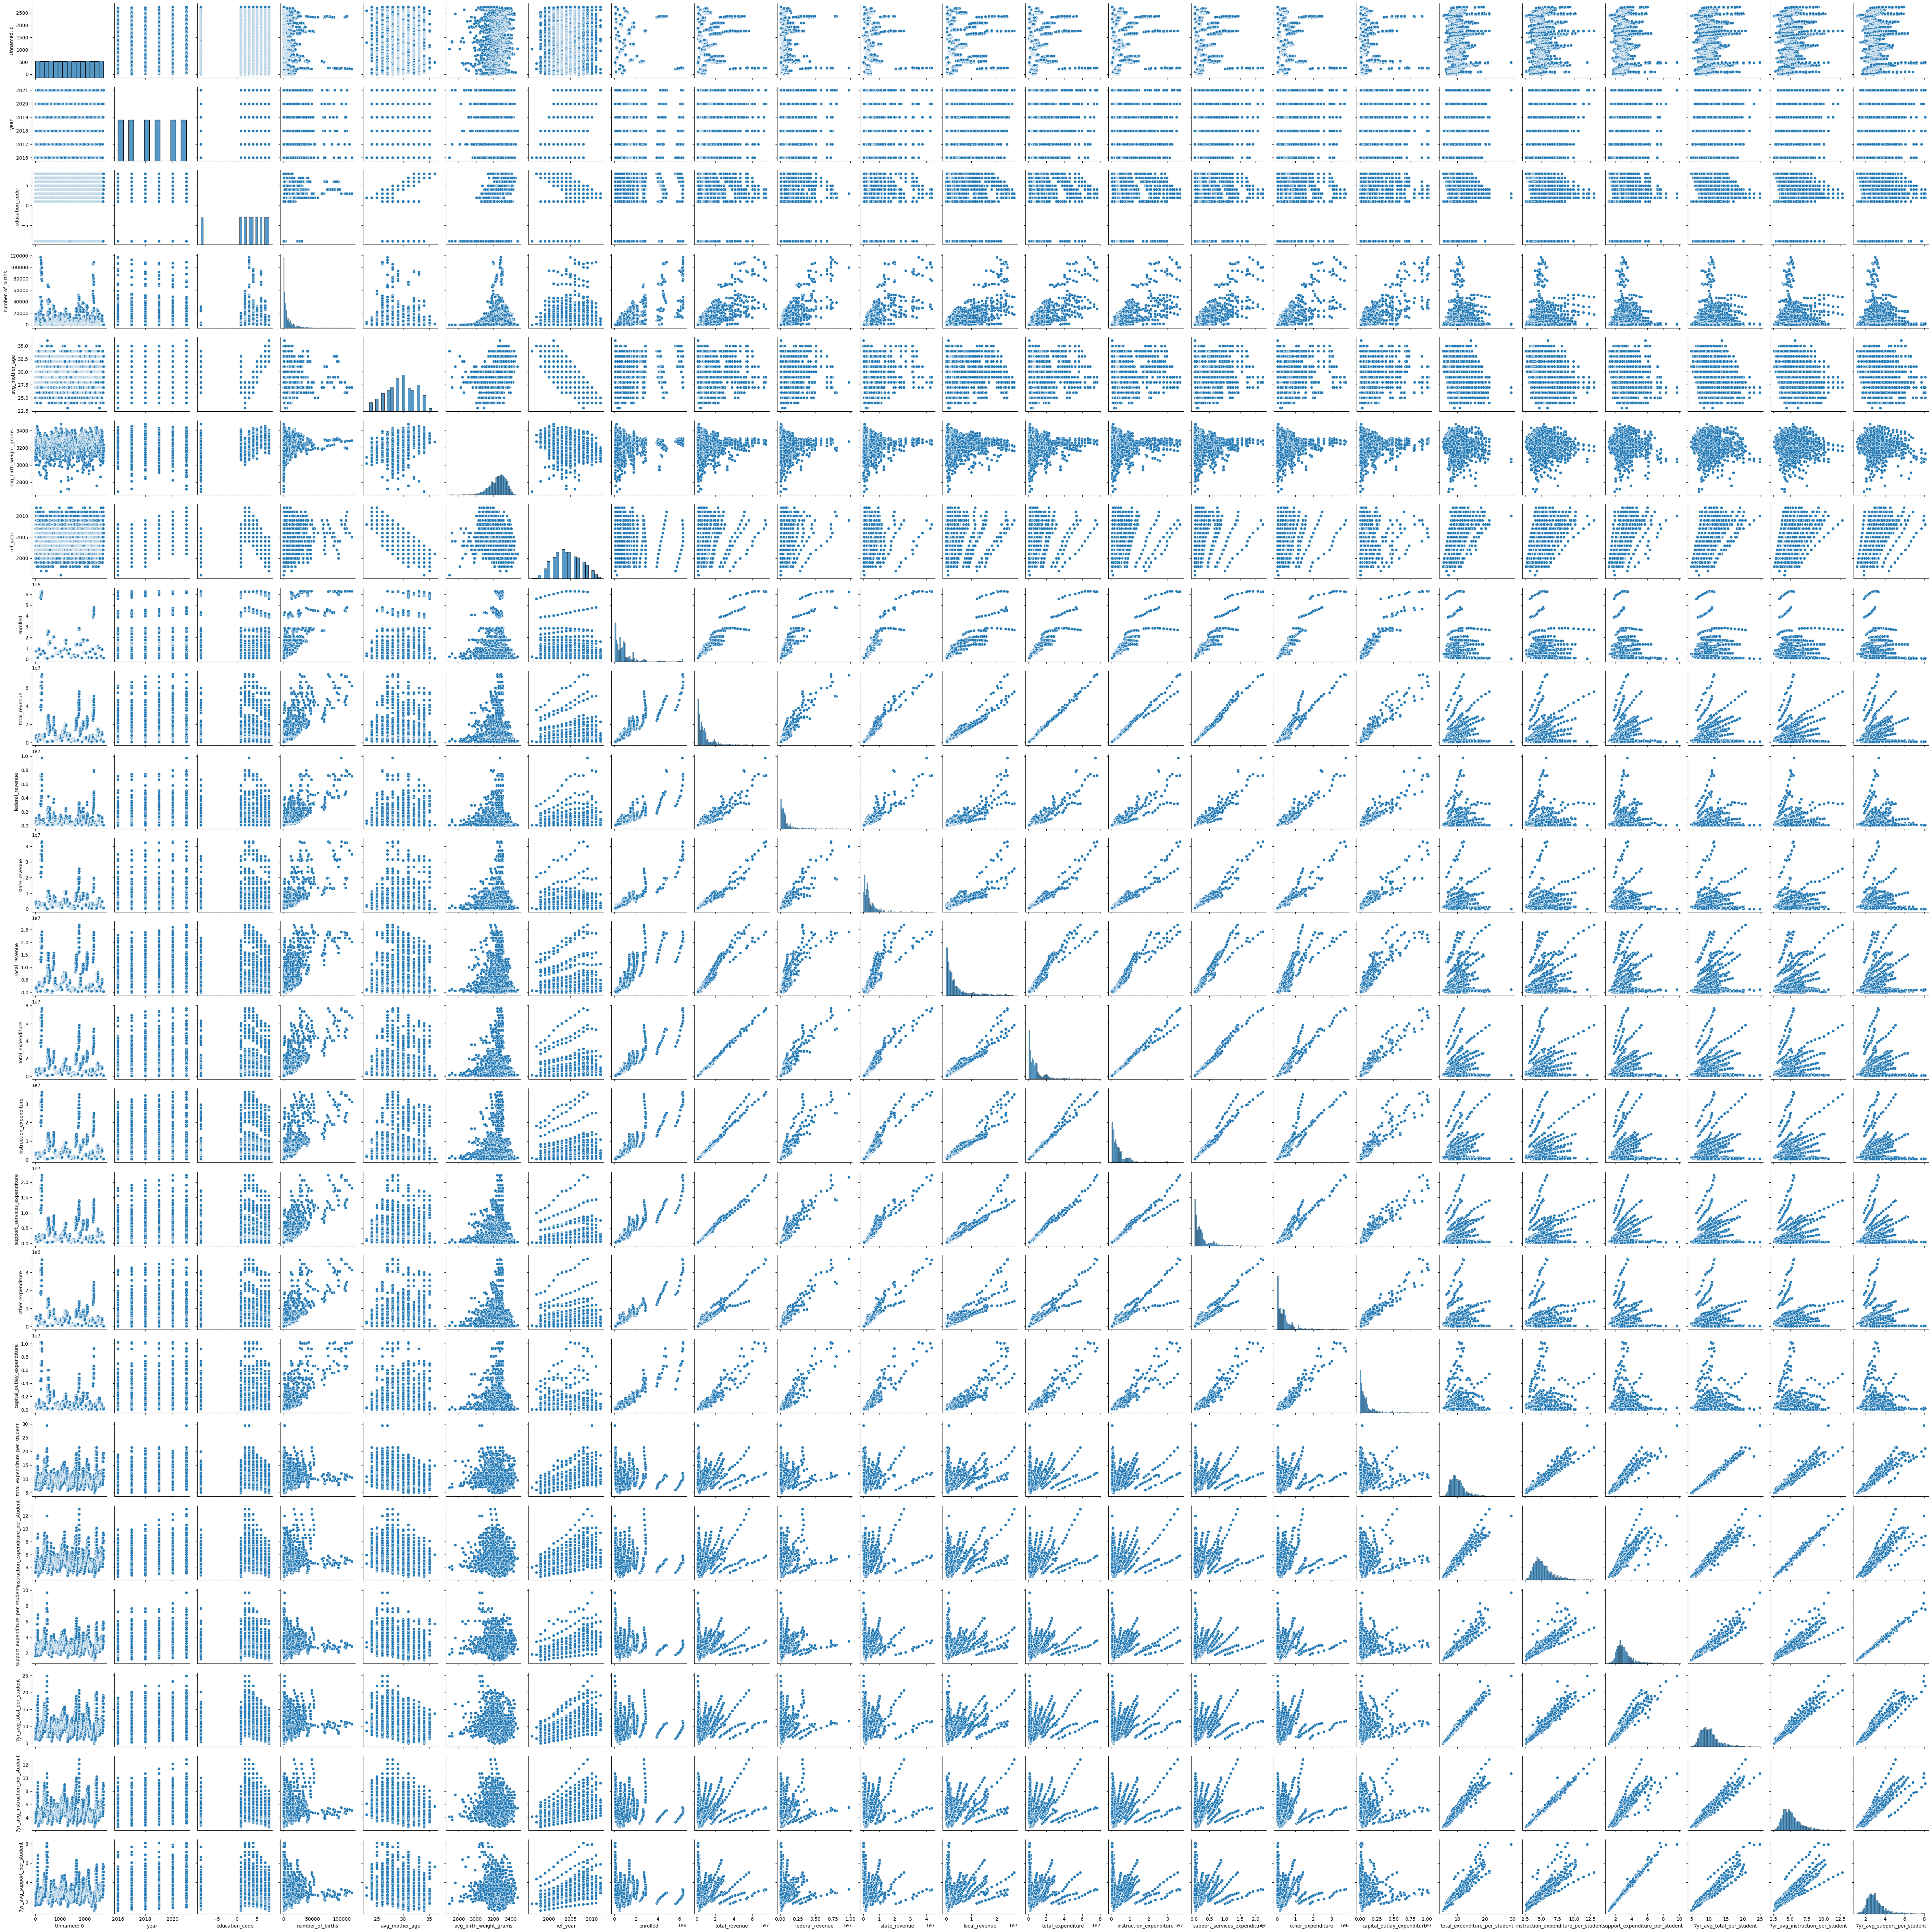

In [6]:
# Create pair plots for the entire data set

p = sns.pairplot(births_finances)

In [8]:
# Export figure

p.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pairplot.png'))

VARIABLE DISTRIBUTION IN PAIR PLOTS

YEAR: static and independent variable. It does not offer much insight value beyond a reference.

EDUCATION CODE: This is a variable of interest. It is the variable that signifies the level of education of the mother, and is central to some questions to be answered. It shows some measure of effect on number of births (notably the low amounts for education below eigth grade and at Ph.D. level), the mother's age at her child's birth (as education increases, the age  increases), and there is even an interesting drop in public educational funding for those who eventually completed a Ph.D. program. The heatmap also indicates a strong correlation with birth weight, though the corresponding scatterplot doesn't imply so very much as a visual.

NUMBER OF BIRTHS: This is a variable of interest. With average mother age, it predictably peaks around the mid-range and drops off at the extremes. There are also interesting peaks with educational expenditures that may be worth further consideration.  The number of births is skewed toward the low end.

AVG MOTHER AGE:  This variable is rougly normally-distributed, though there is a little dip on the higher end.  This is a variable of interest as it correlates with several other factors of interest, including birth weight.

AVG BIRTH WEIGHT GRAMS: This is a variable of interest. The distribution has a slight skew to the right. This is a main variable of interest as it not only correlates with other interesting variables, but may provide the most meaningful and actionable real-life insight.

REF YEAR: This variable was derived merely for reference and is not of much interest.

ENROLLED: This variable's distribution skews left and is not very uniform. It does not hold much interest; all correlations follow as a natural result of more children (more children, more revenue, for example) rather than as any meaningful insight.

TOTAL REVENUE: Not of interest; a state's educational revenue is only interesting insofar as it is spent, which is covered elsewhere.

FEDERAL REVENUE: Not of interest; a state's educational revenue is only interesting insofar as it is spent, which is covered elsewhere.

STATE REVENUE: Not of interest; a state's educational revenue is only interesting insofar as it is spent, which is covered elsewhere.

LOCAL REVENUE: Not of interest; a state's educational revenue is only interesting insofar as it is spent, which is covered elsewhere.

TOTAL EXPENDITURE: Not of interest; the value in this variable is in its use for calculating per student expenditure, which is itself covered elsewhere

INSTRUCTION EXPENDITURE: Not of interest; the value in this variable is in its use for calculating per student expenditure, which is itself covered elsewhere

SUPPORT SERVICES EXPENDITURE: Not of interest; the value in this variable is in its use for calculating per student expenditure, which is itself covered elsewhere

OTHER EXPENDITURE: Not of interest; there is no explicitly understood nature of "other" and serves no purpose to the analysis at hand

CAPITAL OUTLAY EXPENDITURE: Not of interest; while there may be a tangential correlation to be found, the funding of construction and remodeling projects is not likely to be a useful point of data for the questions.

TOTAL EXPENDITURE PER STUDENT: This is a variable of interest, though perhaps it would serve more use as a comparitive value with the later calculated 7-year-averages. This variable has fewer assumptions attached to it, so it could be useful as a more grounded measure.

INSTRUCTION EXPENDITURE PER STUDENT: This is a variable of interest, though perhaps it would serve more use as a comparitive value with the later calculated 7-year-averages. This variable has fewer assumptions attached to it, so it could be useful as a more grounded measure.

SUPPORT SERVICES EXPENDITURE PER STUDENT: This is a variable of interest, though perhaps it would serve more use as a comparitive value with the later calculated 7-year-averages. This variable has fewer assumptions attached to it, so it could be useful as a more grounded measure.

7YR AVG TOTAL PER STUDENT: This is a variable of interest. Though correlation is lacking, it is the best measure in the data set to connect potential real-world effects of education on later maternity beyond merely getting more of it.

7YR AVG INSTRUCTION PER STUDENT: This is a variable of interest. Though correlation is lacking, it is the best measure in the data set to connect potential real-world effects of education on later maternity beyond merely getting more of it.

7YR AVG SUPPORT PER STUDENT: This is a variable of interest. Though correlation is lacking, it is the best measure in the data set to connect potential real-world effects of education on later maternity beyond merely getting more of it.

### 8. Categorical Plot

<AxesSubplot:xlabel='avg_birth_weight_grams', ylabel='Count'>

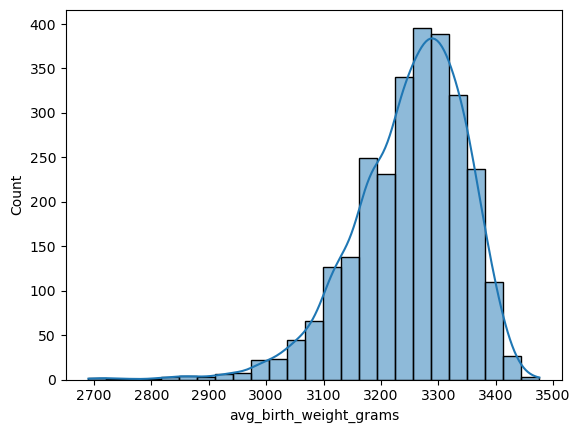

In [12]:
# Create histogram for avg_birth_weight_grams

sns.histplot(births_finances['avg_birth_weight_grams'], bins = 25, kde = True)

In [13]:
# Set categories

# Some quick research reveals that a low birth weight is defined as below 2500 grams, and a high birth weight is defined as above 4400 grams.
# As none of the values in the data set reaches those values, it must be made clear that the categories are only in reference to
# the data set itself and NOT as a reference for medically-defined weight categories

births_finances.loc[births_finances['avg_birth_weight_grams'] < 3150, 'weight_category'] = 'Low'
births_finances.loc[(births_finances['avg_birth_weight_grams'] >= 3150) & (births_finances['avg_birth_weight_grams'] < 3350), 'weight_category'] = 'Average'
births_finances.loc[births_finances['avg_birth_weight_grams'] >= 3350, 'weight_category'] = 'High'

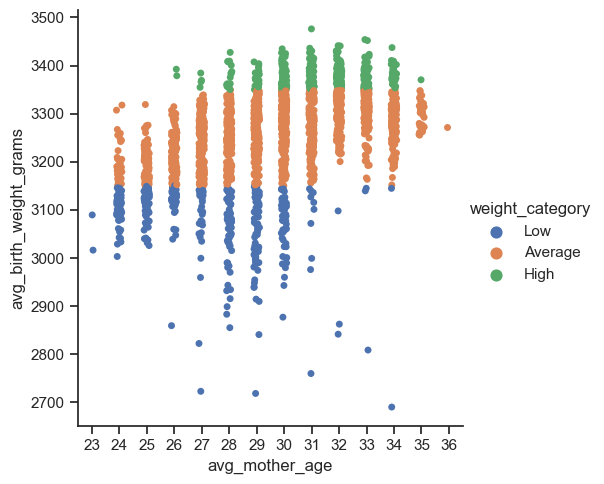

In [14]:
# Create categorical plot

sns.set(style = "ticks")
g = sns.catplot(x = "avg_mother_age", y = "avg_birth_weight_grams", hue = "weight_category", data = births_finances)

In [15]:
# Export

g.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_vs_weight_catplot.png'))

INTERPRETATION

High birth weights are more common as the mother's age approaches a peak at 31, and does not occur at all with mothers 25 and below.

Low birth weights are less common as the mother's age advances, becoming exceptionally rare after 31 and not occurring at all at age 35 or older.

The highest regular variability in birth weights seems to occur with mothers between 26 and 30. 

The overall general trend is a positive correlation between the mother's age and the child's birth weight, though after age 31 the birth weight seems to plateau with fewer extremes either way.

### 9. Review Analysis Questions

A. Is there a correlation between a mother’s educational level and the age at which they give birth?
    Yes, there is some moderate connection between them, likely due to a delay in life events in favor of schooling.

B. Is there a correlation between a mother’s educational level and their children’s birth weight?
    Yes, there is a strong connection between them, though the exploration thus far leads me to believe there is more to the story. Though the correlation value is high, the scatterplot shows that those who were only educated up to the eighth grade are more likely to have a higher birth weight, but then the value drops down immediately for those who had some high school and trends predictably upward from there until Ph.D. level.

C. Does higher educational funding per student impact the number of people who attain higher educational levels?
    This is a little unclear. There seems to be overall less funding for those who did not go past eighth grade, but the amount of (high) school funding among those who receieved various levels of college degrees also seems to drop. The data would indicate, somewhat paradoxically, that higher school funding per student was a better predictor of ENDING their education after high school. More insight may be needed.

D. If so, is there a correlation between educational funding and the age that mothers give birth?
    There does seem to be a correlation between educational funding and maternal age--higher funding generally correlates to lower birthing age.

E. Is there a correlation between educational funding and baby birth weights?
    There may be a tenuous connection here, but to say for certain would likely require more exploration.

### 10. Hypotheses

A mother-to-be's attainment of higher levels of education is likely to delay the age at which she gives birth.

Mothers who have not received an education past eighth grade are more likely to exhibit more extreme birthing statistics, perhaps due to other life circumstances that merely correlate with reasons why further education would not be pursued.

A child's birth weight is directly influenced by the mother's age.

Funding of public education at grade school levels is not a strong predictor of future academic achievement--or at least not at the level of funding per student as provided by the data set. Perhaps the only predictor of academic achievement determinable by funding would be uncovered by continued and current funding at each level.

Educational level only delays births and does not drastically alter the total number of births.

While a geospatial analysis has yet to be performed, I expect to see a difference in educational level by state as well as funding difference. I think geospatial analysis could likely be the missing link to making sense of some of these results.